### Kaggle Link
https://www.kaggle.com/c/titanic

### Competition Description
---

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Data Dictionary

| Variable  |    Definition       | Key   |
|-----------|:-------------------:|------:|
| survival  | Survival            | 0 = No, 1 = Yes           |
| pclass    | Ticket class        | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex       | Sex                 |       |
| Age       | Age in years        |       |
| sibsp     | # of siblings / spouses aboard the Titanic      |       |
| parch     | # of parents / children aboard the Titanic      |       |
| ticket    | Ticket number       |       |
| fare      | Passanger fare      |       |
| cabin     | Cabin number        |       |
| embarked  | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

### Data Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('white')

In [2]:
df_train = pd.read_csv('../Data/Kaggle/titanic_train.csv')
df_valid = pd.read_csv('../Data/Kaggle/titanic_test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df_valid.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


First things first, let's drop some meaningless variables. But let's save the ID for the submission.

In [3]:
df_ids = df_valid['PassengerId']
for df in [df_train, df_valid]:
    df.drop(['PassengerId'], axis=1, inplace=True)

### First Look at the Data

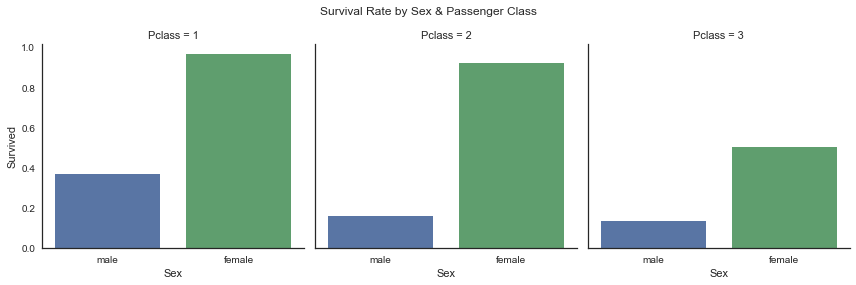

In [8]:
g = sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival Rate by Sex & Passenger Class')

It's easy to note a that the majority of the survivors were women. Also, most of them, for both gender, were concentrated in `Pclass = 1`.

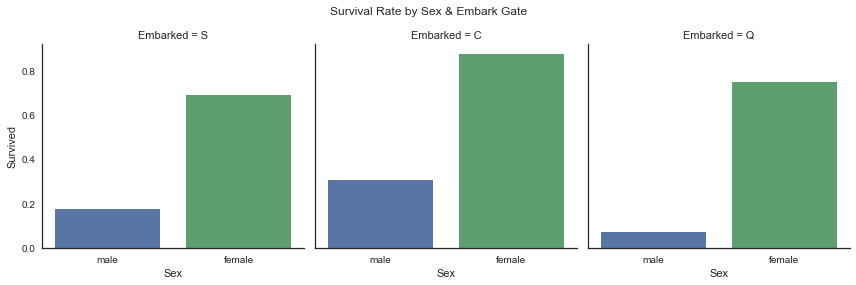

In [9]:
g = sns.factorplot(x='Sex', y='Survived', col='Embarked', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival Rate by Sex & Embark Gate')

Here we can notice that for both men and women, the majority of survivors had `Embark = C`.

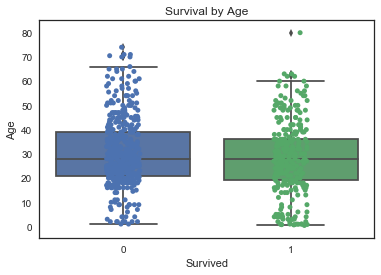

In [10]:
g = sns.boxplot(x='Survived', y='Age', data=df_train)
g = sns.stripplot(x='Survived', y='Age', data=df_train, jitter=True, edgecolor='gray')
plt.title('Survival by Age')

Here we can see that, in general, the age doesn't say much about the chance of surviving or not. However, we can see that most of the oldest people died.

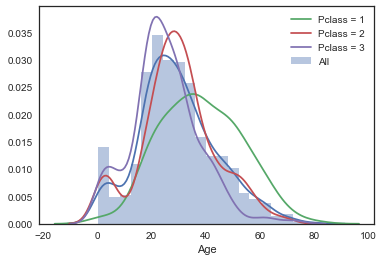

In [11]:
sns.distplot(df_train['Age'].dropna(), label='All')
sns.distplot(df_train[df_train['Pclass'] == 1]['Age'].dropna(), hist=False, label='Pclass = 1')
sns.distplot(df_train[df_train['Pclass'] == 2]['Age'].dropna(), hist=False, label='Pclass = 2')
sns.distplot(df_train[df_train['Pclass'] == 3]['Age'].dropna(), hist=False, label='Pclass = 3')

As the plot above shows, the age distribution among `Pclass` are similar, most of the people being middle-aged.

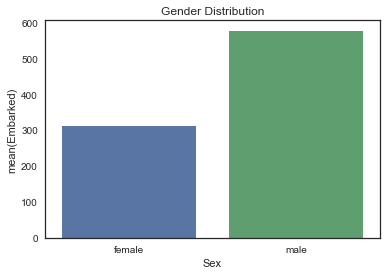

In [12]:
s = df_train.groupby(['Sex'], as_index=False)['Embarked'].count()
sns.barplot(x='Sex', y='Embarked', data=s)
plt.title('Gender Distribution')

### Feature Engineering & Data Cleaning

In [4]:
df_both = pd.concat([df_train, df_valid])

* Features `Cabin`, `Age` and `Emabarked` have some missing values.
    * NaN `Cabin` will be filled according to the median value given the `Pclass` feature value
    * NaN `Age` will be filled according to its median value across the data set
    * NaN `Embarked` will be filled according to the median value given the `Pclass` feature value
    * NaN `Fare` will be filled according to its median and transformed to `int`
    * `Ticket` will be replaced by its first letter, indicative of the its placement
    
However, some pre-processing have to be done. First, for the `Cabin` feature, let's keep just the letter.

In [5]:
for df in [df_train, df_valid]: 
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else x)

Now we are going to fill NaN values as specified above.

In [6]:
df_both = df_both.groupby(by=['Pclass', 'Cabin', 'Embarked'])['Sex'].count().to_frame().reset_index()

In [7]:
df_both = df_both.sort_values(['Sex', 'Pclass'], ascending=False).groupby(['Pclass']).first().reset_index()

In [8]:
df_both

,Pclass,Cabin,Embarked,Sex
0,1,C23 C25 C27,S,6
1,2,F2,S,4
2,3,G6,S,5


In [9]:
for df in [df_train, df_valid]:
    # Filling 'Cabin' according to 'Pclass'
    df.loc[(df['Pclass'] == 1) & (df['Cabin'].isnull()), 'Cabin'] = 'C'
    df.loc[(df['Pclass'] == 2) & (df['Cabin'].isnull()), 'Cabin'] = 'F'
    df.loc[(df['Pclass'] == 3) & (df['Cabin'].isnull()), 'Cabin'] = 'G'
    # Filling 'Embarked' according to 'Pclass'
    df['Embarked'].fillna('S', inplace=True)
    # Filling 'Age' by its median
    df['Age'].fillna(df['Age'].median(), inplace=True)
    # Filling 'Fare' by its median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Fare'] = df['Fare'].apply(lambda x: int(x))

In [10]:
for df in [df_train, df_valid]:
    df['Ticket'] = df['Ticket'].apply(lambda x: str(x)[0])

Next, let's transform the `Age` feature into category.

In [11]:
for df in [df_train, df_valid]:
    # Categorizing 'Ages'
    bins = (0, 5, 12, 18, 25, 35, 60, 120)
    names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df['Age'], bins, labels=names)
    df['Age'] = categories

Now, let's perform some feature engineering. We are going to create three new features: 

* `FamilySize` is going to be given by the sum of `SibSp` and `Parch + 1`
* `IsAlone` is gonna be `1` if `FamilySize == 1` 
* `Title` is going to be the first string after the comma in the `Name` field
* `NameLen` is going to be given by the surname lenght

In [12]:
for df in [df_train, df_valid]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [13]:
for df in [df_train, df_valid]:    
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [14]:
for df in [df_train, df_valid]:    
    df['Title'] = df['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()
    
    df.loc[df['Title'].isin(['Lady', 'the Countess', 'Dona']), 'Title'] = 'Royalty'
    df.loc[df['Title'].isin(['Mme']), 'Title'] = 'Mrs'
    df.loc[df['Title'].isin(['Mlle','Ms']), 'Title'] = 'Miss'
    df.loc[df['Title'].isin(['Capt', 'Col', 'Major','Rev']), 'Title'] = 'Officer'
    df.loc[df['Title'].isin(['Jonkheer', 'Don','Sir']), 'Title'] = 'Royalty'
    df.loc[(df['Sex'] == 'male')   & (df['Title'] == 'Dr'),'Title'] = 'Mr'
    df.loc[(df['Sex'] == 'female') & (df['Title'] == 'Dr'),'Title'] = 'Mrs'

In [15]:
for df in [df_train, df_valid]:    
     df['NameLen'] = df['Name'].apply(lambda x: len(str(x)))

Now, let's drop `Name`, `Parch` and `SibSp`.

In [16]:
for df in [df_train, df_valid]:  
    df.drop(['Parch', 'SibSp', 'Name'], axis=1, inplace=True)

In [17]:
df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,NameLen
0,0,3,male,Student,A,7,G,S,2,0,Mr,23
1,1,1,female,Adult,P,71,C,C,2,0,Mrs,51
2,1,3,female,Young Adult,S,7,G,S,1,1,Miss,22
3,1,1,female,Young Adult,1,53,C,S,2,0,Mrs,44
4,0,3,male,Young Adult,3,8,G,S,1,1,Mr,24


### Digging Deeper

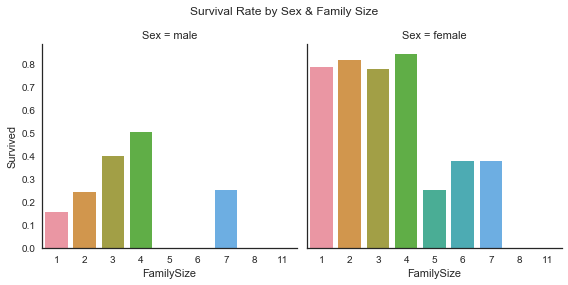

In [27]:
g = sns.factorplot(x='FamilySize', y='Survived', col='Sex', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival Rate by Sex & Family Size')

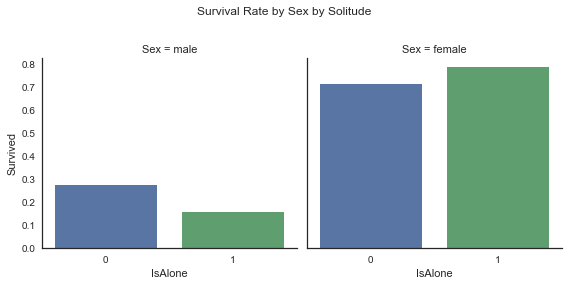

In [28]:
g = sns.factorplot(x='IsAlone', y='Survived', col='Sex', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Rate by Sex by Solitude')

There are more men, however, more women survived.

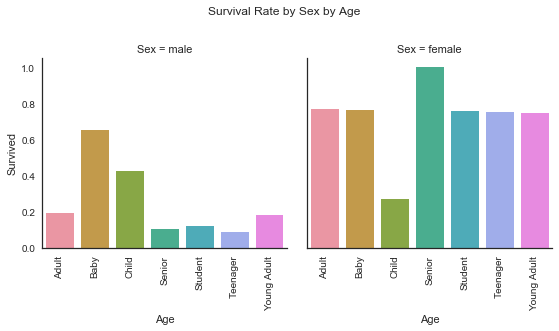

In [29]:
g = sns.factorplot(x='Age', y='Survived', col='Sex', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.8)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Survival Rate by Sex by Age')

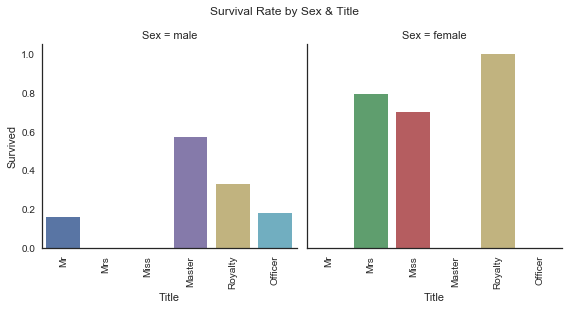

In [30]:
g = sns.factorplot(x='Title', y='Survived', col='Sex', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.85)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Survival Rate by Sex & Title')

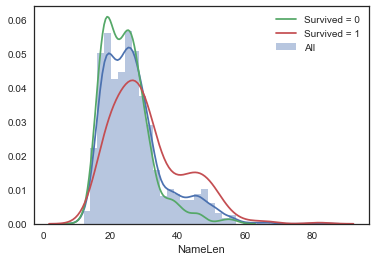

In [31]:
sns.distplot(df_train['NameLen'], label='All')
sns.distplot(df_train[df_train['Survived'] == 0]['NameLen'], hist=False, label='Survived = 0')
sns.distplot(df_train[df_train['Survived'] == 1]['NameLen'], hist=False, label='Survived = 1')

In [32]:
df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,NameLen
0,0,3,male,Student,A,7,G,S,2,0,Mr,23
1,1,1,female,Adult,P,71,C,C,2,0,Mrs,51
2,1,3,female,Young Adult,S,7,G,S,1,1,Miss,22
3,1,1,female,Young Adult,1,53,C,S,2,0,Mrs,44
4,0,3,male,Young Adult,3,8,G,S,1,1,Mr,24


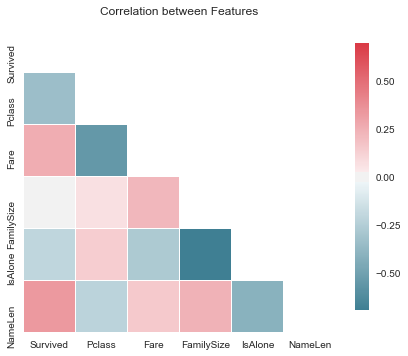

In [33]:
corr = df_train.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(7, 7))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.title('Correlation between Features')

I's easy to observe a positive correlation between both the name lenght and the fare with the survival outcome.

### Dealing with Categorical Features

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

categorical = ['Sex', 'Age', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Pclass']

for df in [df_train, df_valid]:
    for cat in categorical:
        df[cat] = le.fit_transform(df[cat])
        print(le.classes_)
        print(le.transform(le.classes_))

['female' 'male']
[0 1]
['Adult' 'Baby' 'Child' 'Senior' 'Student' 'Teenager' 'Young Adult']
[0 1 2 3 4 5 6]
['1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'C' 'F' 'L' 'P' 'S' 'W']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']
[0 1 2 3 4 5 6 7]
['C' 'Q' 'S']
[0 1 2]
['Master' 'Miss' 'Mr' 'Mrs' 'Officer' 'Royalty']
[0 1 2 3 4 5]
[1 2 3]
[0 1 2]
['female' 'male']
[0 1]
['Adult' 'Baby' 'Child' 'Senior' 'Student' 'Teenager' 'Young Adult']
[0 1 2 3 4 5 6]
['1' '2' '3' '4' '6' '7' '9' 'A' 'C' 'F' 'L' 'P' 'S' 'W']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
['A' 'B' 'C' 'D' 'E' 'F' 'G']
[0 1 2 3 4 5 6]
['C' 'Q' 'S']
[0 1 2]
['Master' 'Miss' 'Mr' 'Mrs' 'Officer' 'Royalty']
[0 1 2 3 4 5]
[1 2 3]
[0 1 2]


In [20]:
df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,NameLen
0,0,2,1,4,9,7,6,2,2,0,2,23
1,1,0,0,0,13,71,2,0,2,0,3,51
2,1,2,0,6,14,7,6,2,1,1,1,22
3,1,0,0,6,0,53,2,2,2,0,3,44
4,0,2,1,6,2,8,6,2,1,1,2,24


In [21]:
train_objs_num = len(df_train)

dataset = pd.concat(objs=[df_train, df_valid], axis=0)   
dataset = pd.get_dummies(columns=categorical, data=dataset)

df_train = dataset[:train_objs_num]
df_valid = dataset[train_objs_num:]

In [22]:
df_train.head()

,FamilySize,Fare,IsAlone,NameLen,Survived,Sex_0,Sex_1,Age_0,Age_1,Age_2,...,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Pclass_0,Pclass_1,Pclass_2
0,2,7,0,23,0.0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,2,71,0,51,1.0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,7,1,22,1.0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,2,53,0,44,1.0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,1,8,1,24,0.0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [23]:
df_valid.head()

,FamilySize,Fare,IsAlone,NameLen,Survived,Sex_0,Sex_1,Age_0,Age_1,Age_2,...,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Pclass_0,Pclass_1,Pclass_2
0,1,7,1,16,NaN,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2,7,0,32,NaN,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,9,1,25,NaN,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,8,1,16,NaN,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,3,12,0,44,NaN,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


### Testing Models

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [25]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']
X_valid = df_valid.drop(['Survived'], axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [43]:
def plot_importances(clf, features):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 5))
    plt.title("Feature importances")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), features[indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV

#### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=0)

params = {  
    'n_estimators':       [100, 130, 150, 180],
    'criterion':          ['gini', 'entropy'],
    'max_depth':          [2, 3, 5, 10, 15, None],
    'max_features':       ['log2', 'sqrt', 'auto']
}

grid = GridSearchCV(clf_rf, params, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print (grid.best_params_)
print (grid.best_score_)

clf_rf = grid.best_estimator_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   33.4s finished


{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 130}
0.832865168539


In [49]:
scores = cross_val_score(clf_rf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.12)


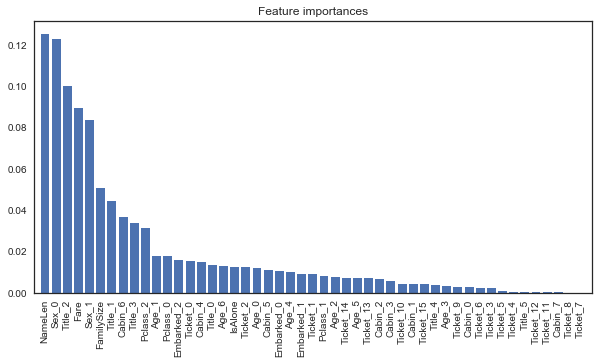

In [50]:
plot_importances(clf_rf, X_train.columns.values)

In [51]:
y_pred = clf_rf.predict(X_valid)

#### Decsion Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)

params = {  
    'criterion':          ['gini', 'entropy'],
    'max_depth':          [2, 3, 5, 10, 15, None],
    'max_features':       ['log2', 'sqrt', 'auto']
}

grid = GridSearchCV(clf_dt, params, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print (grid.best_params_)
print (grid.best_score_)

clf_dt = grid.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   14.4s finished


{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}
0.825842696629


In [55]:
scores = cross_val_score(clf_dt, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.74 (+/- 0.17)


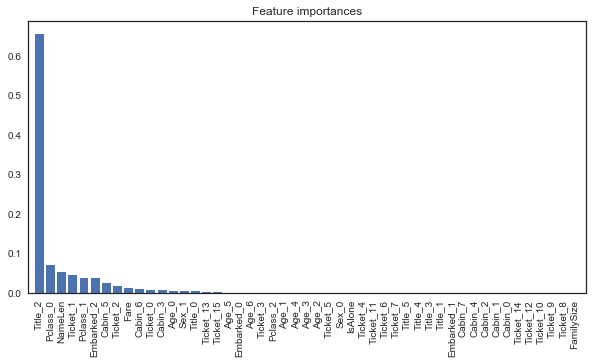

In [56]:
plot_importances(clf_dt, X_train.columns.values)

#### Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier(random_state=0)

params = { 
    'learning_rate':      [0.01, 0.05, 0.1, 0.5, 1.0],
    'n_estimators':       [20, 60, 80, 100],
    'max_depth':          [2, 3, 5, 10, None],
    'max_features':       ['log2', 'sqrt', 'auto', None]
}

grid = GridSearchCV(clf_gb, params, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print (grid.best_params_)
print (grid.best_score_)

clf_gb = grid.best_estimator_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 916 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   52.3s finished


{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 80}
0.839887640449


In [61]:
scores = cross_val_score(clf_gb, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.09)


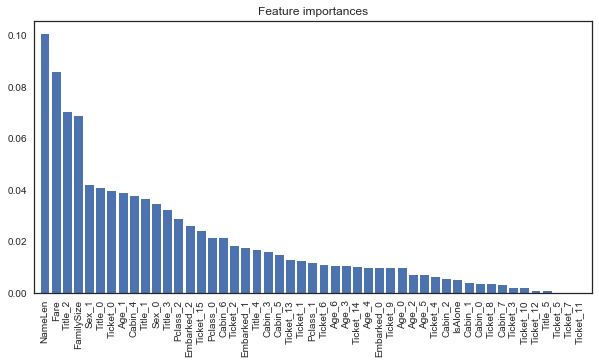

In [62]:
plot_importances(clf_gb, X_train.columns.values)

#### Ada Boost

In [65]:
from sklearn.ensemble import AdaBoostClassifier

clf_ab = AdaBoostClassifier(random_state=0)

params = { 
    'learning_rate':      [0.01, 0.05, 0.1, 0.5, 1.0],
    'n_estimators':       [10, 20, 60]
}

grid = GridSearchCV(clf_ab, params, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print (grid.best_params_)
print (grid.best_score_)

clf_ab = grid.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   13.9s finished


{'learning_rate': 0.5, 'n_estimators': 20}
0.834269662921


In [66]:
scores = cross_val_score(clf_ab, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.10)


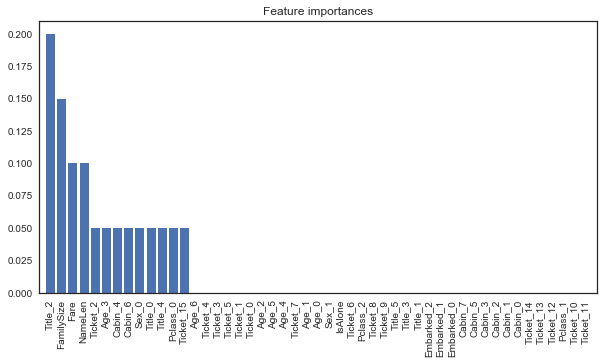

In [67]:
plot_importances(clf_ab, X_train.columns.values)

### Scoring and Voting

In [79]:
from sklearn.ensemble import VotingClassifier

clf_vc = VotingClassifier(estimators=[('rf', clf_rf), ('gb', clf_gb), ('ab', clf_ab)], voting='hard')
clf_vc.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weig...ithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=20, random_state=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [80]:
scores = cross_val_score(clf_vc, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.10)


In [81]:
y_pred = clf_vc.predict(X_valid)

In [82]:
submission = pd.DataFrame({'PassengerId': df_ids, 'Survived': y_pred.astype(int)})
submission.to_csv('titanic-output.csv', index=False)

### XGBoost

In [62]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

In [63]:
model = xgb.XGBClassifier(silent=1)
model_params = {
    'n_estimators':       [50, 100, 200, 300],
    'learning_rate':      [0.05, 0.1, 0.5],
    'max_depth':          [2, 3, 5, 10],
    'min_child_weight':   [1, 3, 5, 7],
    'subsample':          [0.3, 0.5, 0.8],
    'colsample_bytree':   [0.3, 0.5, 0.7],
    'colsample_bylevel':  [0.5, 0.7, 1.0]
}

grid = GridSearchCV(model, model_params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print (grid.best_params_)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 11234 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 12784 tasks      | elapsed: 13

{'colsample_bylevel': 0.5, 'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.5}


In [68]:
model = grid.best_estimator_.fit(X_train, y_train)

In [69]:
scores = cross_val_score(model, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.11)


In [70]:
y_pred = model.predict(X_valid)

In [71]:
submission = pd.DataFrame({'PassengerId': df_ids, 'Survived': y_pred.astype(int)})
submission.to_csv('titanic-output.csv', index=False)

### Neural Network

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [28]:
def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

In [29]:
X_train.head()

,FamilySize,Fare,IsAlone,NameLen,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,...,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Pclass_0,Pclass_1,Pclass_2
140,3,15,0,29,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
439,1,10,1,38,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
817,3,37,0,18,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
378,1,4,1,19,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
491,1,7,1,19,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[['FamilySize', 'Fare', 'NameLen']])
X_train[['FamilySize', 'Fare', 'NameLen']] = scaler.transform(X_train[['FamilySize', 'Fare', 'NameLen']])
X_test[['FamilySize', 'Fare', 'NameLen']]  = scaler.transform(X_test[['FamilySize', 'Fare', 'NameLen']])
X_valid[['FamilySize', 'Fare', 'NameLen']] = scaler.transform(X_valid[['FamilySize', 'Fare', 'NameLen']])

In [31]:
X_train.head()

,FamilySize,Fare,IsAlone,NameLen,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,...,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Pclass_0,Pclass_1,Pclass_2
140,0.648534,-0.328142,0,0.202756,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
439,-0.553956,-0.427919,1,1.165172,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
817,0.648534,0.110875,0,-0.973530,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
378,-0.553956,-0.547651,1,-0.866595,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
491,-0.553956,-0.487785,1,-0.866595,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [32]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                3200      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
__________

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train.values, y_train.values, batch_size=128, epochs=100, verbose=0, 
                 validation_data=(X_test.values, y_test.values))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


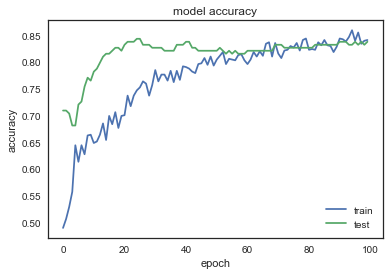

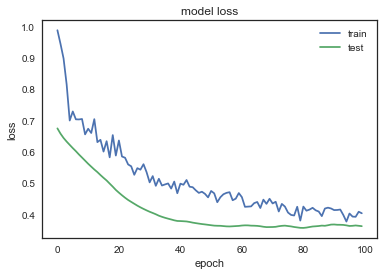

In [34]:
plot_history(hist)

In [35]:
print('Training accuracy: %.2f%% / Validation accuracy: %.2f%%' % (100*hist.history['acc'][-1], 100*hist.history['val_acc'][-1]))

Training accuracy: 84.13% / Validation accuracy: 83.80%


In [36]:
y_pred = model.predict_classes(X_valid.values)

418/418 [==============================] - 0s     


In [37]:
submission = pd.DataFrame({'PassengerId': df_ids, 'Survived': y_pred.flatten()})
submission.to_csv('titanic-output.csv', index=False)